Zadanie 1

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

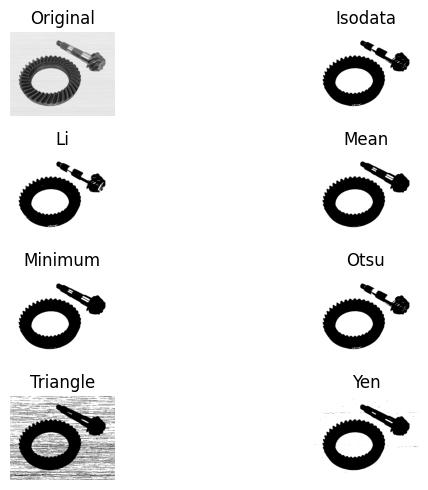

In [27]:

import skimage
from skimage.filters import try_all_threshold

gears = skimage.io.imread('gears1.png', as_gray=True)
try_all_threshold(gears)

0.7270909926470588   0.734854291894694


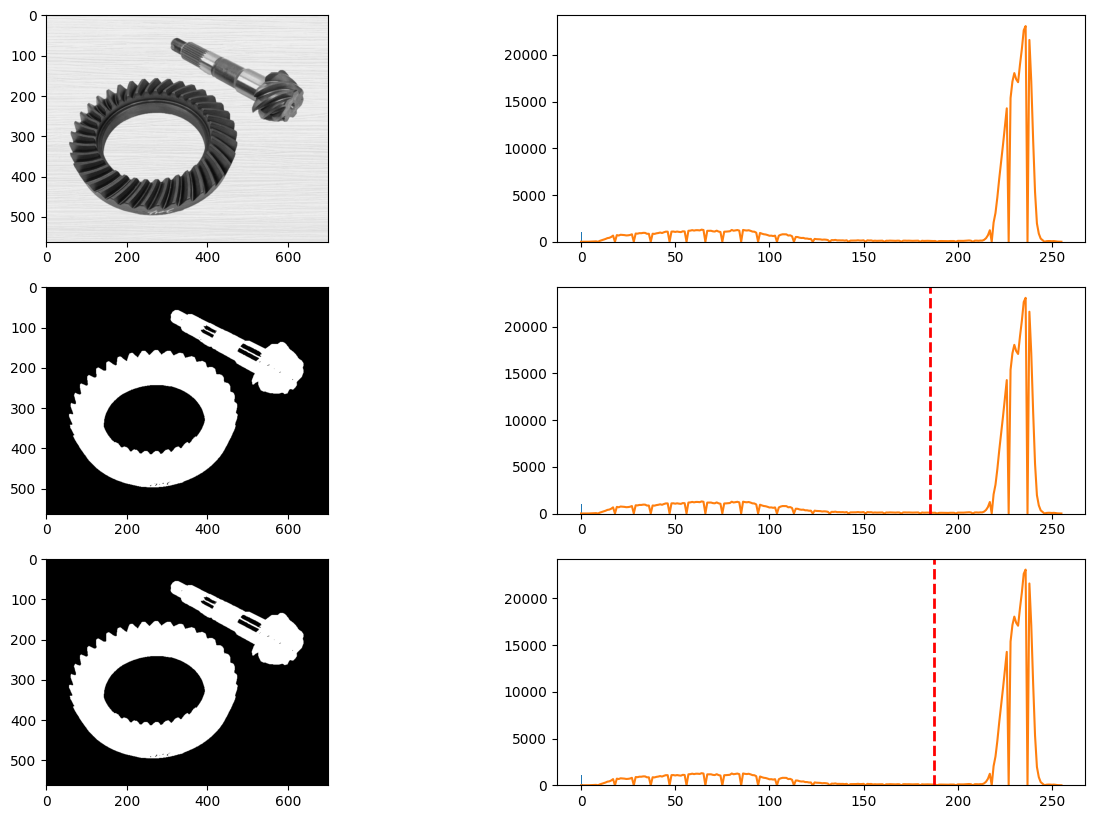

In [28]:

import matplotlib.pyplot as plt
from skimage.filters import threshold_minimum, threshold_mean

threshold_min = threshold_minimum(gears)
threshold_mean = threshold_mean(gears)

print(threshold_min, " ", threshold_mean)


def threshold_image(image, threshold):
    new_image = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] > threshold:
                new_image[i, j] = 0
            else:
                new_image[i, j] = 1
    return new_image


plt.subplots(3, 2, figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.imshow(gears, cmap='gray')
plt.subplot(3, 2, 2)
plt.plot(plt.hist(gears.ravel(), bins=256)[0])
plt.subplot(3, 2, 3)
gears_min = threshold_image(gears, threshold_min)
plt.imshow(gears_min, cmap='gray')
plt.subplot(3, 2, 4)
plt.plot(plt.hist(gears.ravel(), bins=256)[0])
plt.axvline(x=threshold_min*255, color='red', linestyle='--', linewidth=2)
plt.subplot(3, 2, 5)
gears_mean = threshold_image(gears, threshold_mean)
plt.imshow(gears_mean, cmap='gray')
plt.subplot(3, 2, 6)
plt.plot(plt.hist(gears.ravel(), bins=256)[0])
plt.axvline(x=threshold_mean*255, color='red', linestyle='--', linewidth=2)
plt.show()

Zadanie 2

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


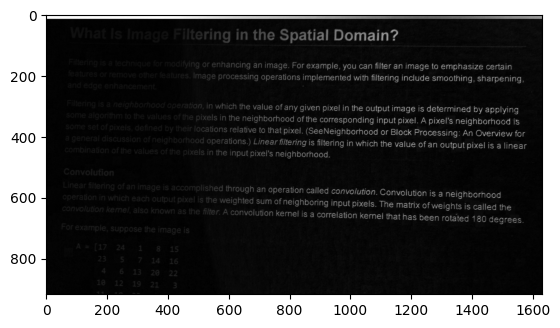

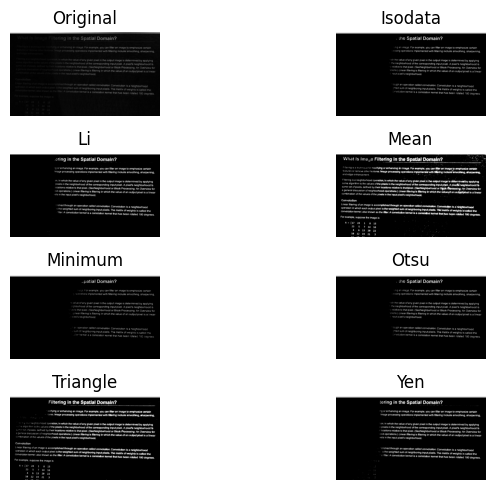

In [29]:
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.filters import try_all_threshold, threshold_mean, rank

text_img = skimage.io.imread('printed_text.png')
text_img = (color.rgb2gray(text_img) * 255).astype(np.uint8)
background_img = rank.maximum(text_img, np.ones((30, 30)))
img = background_img - text_img
plt.imshow(img, cmap='gray')
try_all_threshold(img)
best_image = threshold_image(img, threshold_mean(img))
plt.imsave('best_text.jpg', best_image, cmap='gray')

Zadanie 3

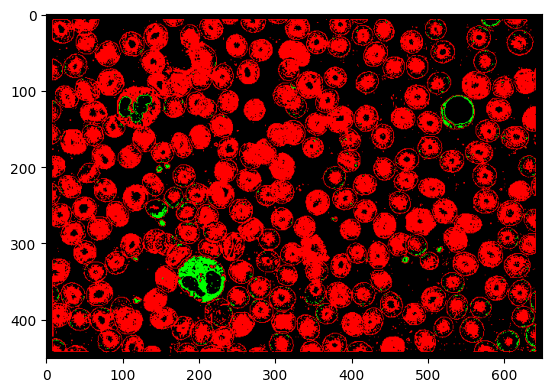

In [30]:
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import skimage

blood = skimage.io.imread('blood_smear (1).jpg')
blood = (color.rgb2gray(blood) * 255).astype(np.uint8)

t1, t_1 = 190, 80
t2, t_2 = 240, 160

r = (blood > t1) * (blood <= t2)
g = (blood > t_1) * (blood <= t_2)
b = np.zeros_like(r)

final_image = np.dstack([r, g, b])
plt.imshow(final_image * 255)


Zadanie 4

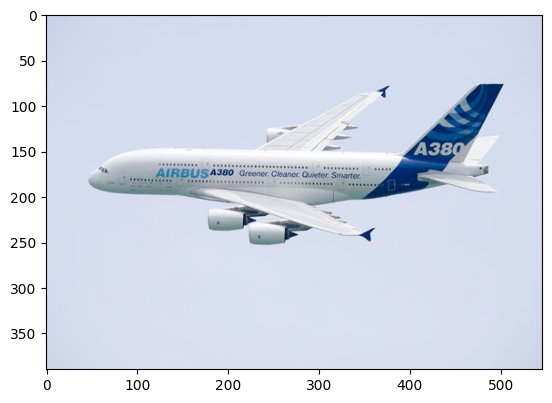

In [31]:

import numpy as np
import matplotlib.pyplot as plt
import skimage

airbus = skimage.io.imread('airbus (1) (1).png')
plt.imshow(airbus)


(100, 100, 3)


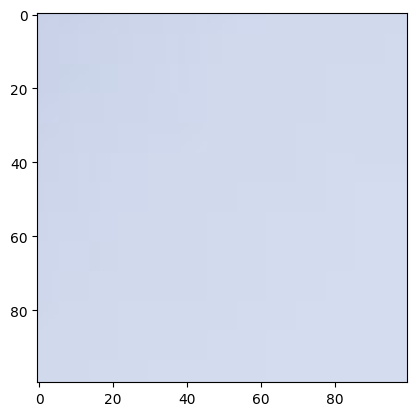

In [32]:
sky = airbus[:100, :100]
plt.imshow(sky)
print(sky.shape)

13.383955399033368


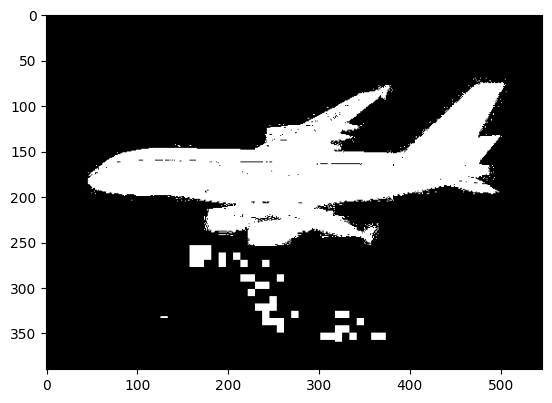

In [33]:
avg_rgb = np.average(sky, axis=(0, 1))
avg_dis = np.linalg.norm(avg_rgb)
max_dis = 0
for i in range(sky.shape[0]):
    for j in range(sky.shape[1]):
        dis = np.linalg.norm(sky[i][j])
        if abs(avg_dis - dis) > max_dis:
            max_dis = abs(avg_dis - dis)
print(max_dis)

new_airbus = np.zeros_like(airbus)
for i in range(airbus.shape[0]):
    for j in range(airbus.shape[1]):
        if np.linalg.norm(abs(airbus[i][j] - avg_rgb)) <= max_dis:
            new_airbus[i][j] = 0
        else:
            new_airbus[i][j] = 255

plt.imshow(new_airbus, cmap='gray')
